<a href="https://colab.research.google.com/github/Allen123321/D-L/blob/master/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import pandas as pd
csv_data = pd.read_csv ('/content/sample_data/california_housing_test.csv')

csv_data.info()
csv_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
boston_data = pd.read_csv ('/content/boston_housing.data')
boston_data.info()
boston_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [ ]:
#基于波士顿房屋租赁数据进行房屋租赁价格预测模型构建，使用lasso回归算法做特征选择后，分别使用线性回归，
#Lasso回归， Ridge回归， ElasticNet四类回归算法构建模型（分别测试1，2，3阶）
import numpy as np
import matplotlib as mpl
import  matplotlib.pyplot as plt
import  pandas as pd
import  warnings
import sklearn
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures  #多项式特征
from sklearn.pipeline import Pipeline
# from sklearn.linear_model.coordinate_descent import ConvergenceWarning #拦截异常的
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  #从sklearn.grid_search中导入网格搜索模块GridSearchCV。
from sklearn import  metrics  #评价指标


In [9]:
def notEmpty(s):
    return s !=''    #是空的话就是FLASE，不是空的话就是TRUE

#设置字符集，防止中文乱码

mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
#拦截异常
#warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [22]:
# 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']  #前13个和房价相关的字段，LSTAT为房价
path = "boston_housing.data"
# 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path,header=None)
# print(fd.shape)    #(506,1) 
data = np.empty((len(fd),14))      #  初始化  len(fd)行，14列

for i,d in enumerate(fd.values):   #enumerate生成一列索引i,d为其元素
  d= map(float,filter(notEmpty,d[0].split(' '))) #filter一个函数，一个list, 就是空的扔掉，有值的留下
  #根据函数结果是否为真 ，来过滤list中的项
  data[i]=list(d)  

#分割数据
x,y = np.split(data,(13,),axis=1)  #分割前13列数据
#print(x[0:5])
#print(y)  #由于y是个二维的，所以要用ravel拉成一维的
y = y.ravel()  #转换格式  拉直操作
#print(y[0:5])
ly=len(y)
#print(y.shape)
print('样本数据量:%d,特征个数:%d '%x.shape)
print('target样本数据量:%d'%y.shape[0])



 


样本数据量:506,特征个数:13 
target样本数据量:506


In [29]:
#Pipeline常用于并行调参
models = [
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', RidgeCV(alphas=np.logspace(-3,1,20)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', LassoCV(alphas=np.logspace(-3,1,20))) #logspace 以10为底，从10的-3次方止10的0次方，中间有20步
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', LinearRegression())
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', ElasticNetCV(alphas=np.logspace(-3,1,20)))
        ])
]

In [30]:
#参数字典，字典中的key是属性的名称，value是可选的参数列表
parameters = {
    "poly__degree": [3,2,1],
    "poly__interaction_only": [True, False],#只产生交互相选TRUE，得到[0次方，X本身，Y本身，X1*Y1] ；默认选FLASE，不仅产生交互项，如X1*X1,Y1*Y1也会有
    "poly__include_bias": [True, False],    #多项式幂为零的特征作为线性模型中的截距,默认为True
    "linear__fit_intercept": [True, False]
}



In [24]:
# rf = PolynomialFeatures(2,interaction_only=True)
# a = pd.DataFrame({
#     'name':[1,2,3,4,5],
#     'score':[2,3,4,4,5]
# })
# b=rf.fit_transform(a)
# print(b)

[[ 1.  1.  2.  2.]
 [ 1.  2.  3.  6.]
 [ 1.  3.  4. 12.]
 [ 1.  4.  4. 16.]
 [ 1.  5.  5. 25.]]


Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.


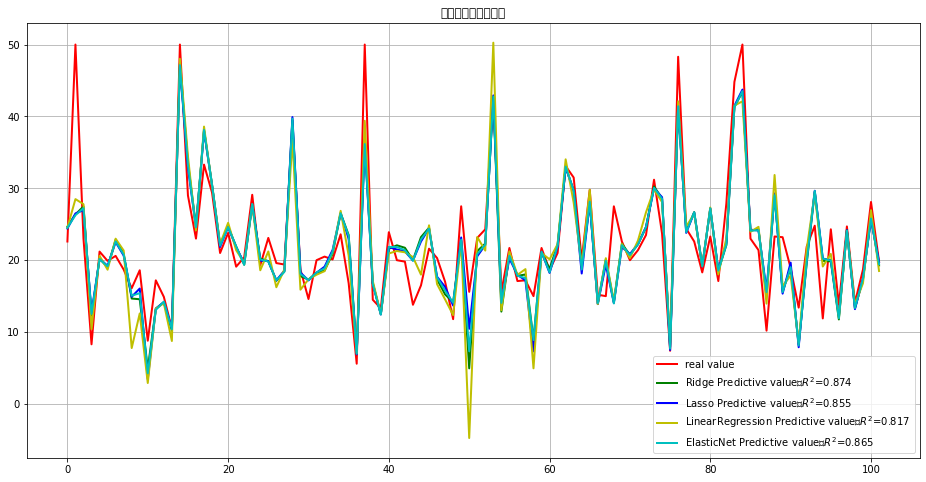

In [34]:

#数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Lasso和Ridge模型比较运行图表展示
titles = ['Ridge','Lasso','LinearRegression','ElasticNet']
colors = ['g-','b-','y-','c-']
plt.figure(figsize=(16,8), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test,'r-',lw=2,label=u'real value')

for t in range(4):
    #获取模型并设置参数
    #GridSearchCV: 进行交叉验证，选择出最优的参数值出来
    #第一个输入参数：进行参数选择的模型，
    #param_grid： 用于进行模型选择的参数字段，要求是字典类型；cv: 进行几折交叉验证

    model = GridSearchCV(models[t], param_grid=parameters, cv=5, n_jobs=1) #五折交叉验证
    #模型训练-网格搜索
    model.fit(x_train, y_train)
    #模型效果值获取（最优参数）
    #print('%s algorithm：Optimal parameters：'%titles[t],model.best_params_)
    #print('%s algorithm：R value=%.3f'%(titles[t],model.best_score_))
    #模型预测
    y_predict=model.predict(x_test)
    #画图
    plt.plot(ln_x_test,y_predict,colors[t],lw=2,label=u'%s Predictive value，$R^2$=%.3f'%(titles[t],model.best_score_))
#图形显示
plt.legend(loc='lower right')
plt.grid(True)
plt.title(u'波士顿房屋价格预测')
plt.show()